In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry_convert as pc
sns.set_style('white')
plt.rcParams["figure.figsize"] = (12, 8)

In [134]:
mean_years = pd.read_csv('mean-years-of-schooling-long-run.csv', sep=';')
mean_years

,Entity,Code,Year,avg_years_of_schooling
0,Afghanistan,AFG,1870,0.01
1,Afghanistan,AFG,1875,0.01
2,Afghanistan,AFG,1880,0.01
3,Afghanistan,AFG,1885,0.01
4,Afghanistan,AFG,1890,0.01
...,...,...,...,...
7758,Zimbabwe,ZWE,2013,8.00
7759,Zimbabwe,ZWE,2014,8.20
7760,Zimbabwe,ZWE,2015,8.20
7761,Zimbabwe,ZWE,2016,8.20


In [135]:
ad_mort = pd.read_csv('Adult mortality.csv', skiprows=1)
ad_mort_2016 = ad_mort[ad_mort['Year'] == 2016]
ad_mort_2016

,Country,Year,Both sexes,Male,Female
0,Afghanistan,2016,245,272,216
17,Albania,2016,96,122,71
34,Algeria,2016,95,106,84
51,Angola,2016,238,275,202
68,Antigua and Barbuda,2016,120,137,104
...,...,...,...,...,...
3026,Venezuela (Bolivarian Republic of),2016,157,217,93
3043,Viet Nam,2016,125,182,66
3060,Yemen,2016,221,244,199
3077,Zambia,2016,286,324,250


In [136]:
mean_years.rename(columns={'Entity':'Country'},inplace=True)

In [137]:
mean_years_2016 = mean_years[mean_years['Year'] == 2016]
mean_years_2016

,Country,Code,Year,avg_years_of_schooling
50,Afghanistan,AFG,2016,3.6
102,Albania,ALB,2016,10.0
154,Algeria,DZA,2016,8.0
172,Andorra,AND,2016,10.2
191,Angola,AGO,2016,5.1
...,...,...,...,...
7569,Venezuela,VEN,2016,10.1
7605,Vietnam,VNM,2016,8.1
7657,Yemen,YEM,2016,3.0
7709,Zambia,ZMB,2016,7.0


In [138]:
merge_df = pd.merge(mean_years_2016,ad_mort_2016, on='Country')
merge_df

,Country,Code,Year_x,avg_years_of_schooling,Year_y,Both sexes,Male,Female
0,Afghanistan,AFG,2016,3.6,2016,245,272,216
1,Albania,ALB,2016,10.0,2016,96,122,71
2,Algeria,DZA,2016,8.0,2016,95,106,84
3,Angola,AGO,2016,5.1,2016,238,275,202
4,Antigua and Barbuda,ATG,2016,9.2,2016,120,137,104
...,...,...,...,...,...,...,...,...
157,Uzbekistan,UZB,2016,11.4,2016,131,167,96
158,Vanuatu,VUT,2016,6.8,2016,129,155,104
159,Yemen,YEM,2016,3.0,2016,221,244,199
160,Zambia,ZMB,2016,7.0,2016,286,324,250


In [139]:
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

In [140]:
merge_df['Continent'] = merge_df['Country'].apply(lambda row: country_to_continent(row))

In [141]:
merge_df

,Country,Code,Year_x,avg_years_of_schooling,Year_y,Both sexes,Male,Female,Continent
0,Afghanistan,AFG,2016,3.6,2016,245,272,216,Asia
1,Albania,ALB,2016,10.0,2016,96,122,71,Europe
2,Algeria,DZA,2016,8.0,2016,95,106,84,Africa
3,Angola,AGO,2016,5.1,2016,238,275,202,Africa
4,Antigua and Barbuda,ATG,2016,9.2,2016,120,137,104,North America
...,...,...,...,...,...,...,...,...,...
157,Uzbekistan,UZB,2016,11.4,2016,131,167,96,Asia
158,Vanuatu,VUT,2016,6.8,2016,129,155,104,Oceania
159,Yemen,YEM,2016,3.0,2016,221,244,199,Asia
160,Zambia,ZMB,2016,7.0,2016,286,324,250,Africa


In [142]:
merge_df.drop(columns='Year_y',inplace=True)
merge_df.rename(columns={'Year_x':'Year',
                         'Both sexes':'mort_rate_both_sexes',
                         'Male':'mort_rate_male',
                         'Female':'mort_rate_female'}, inplace=True)

In [143]:
merge_df

,Country,Code,Year,avg_years_of_schooling,mort_rate_both_sexes,mort_rate_male,mort_rate_female,Continent
0,Afghanistan,AFG,2016,3.6,245,272,216,Asia
1,Albania,ALB,2016,10.0,96,122,71,Europe
2,Algeria,DZA,2016,8.0,95,106,84,Africa
3,Angola,AGO,2016,5.1,238,275,202,Africa
4,Antigua and Barbuda,ATG,2016,9.2,120,137,104,North America
...,...,...,...,...,...,...,...,...
157,Uzbekistan,UZB,2016,11.4,131,167,96,Asia
158,Vanuatu,VUT,2016,6.8,129,155,104,Oceania
159,Yemen,YEM,2016,3.0,221,244,199,Asia
160,Zambia,ZMB,2016,7.0,286,324,250,Africa


In [144]:
def get_data(year):
    mortality = ad_mort[ad_mort['Year'] == year]
    schooling = mean_years[mean_years['Year'] == year]
    merge_df = pd.merge(schooling,mortality, on='Country')
    merge_df['Continent'] = merge_df['Country'].apply(lambda row: country_to_continent(row))
    merge_df.drop(columns='Year_y',inplace=True)
    merge_df.rename(columns={'Year_x':'Year',
                             'Both sexes':'mort_rate_both_sexes',
                             'Male':'mort_rate_male',
                             'Female':'mort_rate_female'}, inplace=True)
    return merge_df
    

In [145]:
def list_data(years):
    df_list = []
    for x in years:
        df_list.append(get_data(x))
    
    return df_list


In [146]:
years_list = [range(2010,2017)]
list_data(years_list)

[Empty DataFrame
 Columns: [Code, Year, avg_years_of_schooling, Country, mort_rate_both_sexes, mort_rate_male, mort_rate_female, Continent]
 Index: []]

In [147]:
df_2010 = get_data(2010)
df_2011 = get_data(2011)
df_2012 = get_data(2012)
df_2013 = get_data(2013)
df_2014 = get_data(2014)
df_2015 = get_data(2015)
df_2016 = get_data(2016)

Text(0.5, 1.0, 'Comparison of Mortality and Average Years of Schooling per Continent')

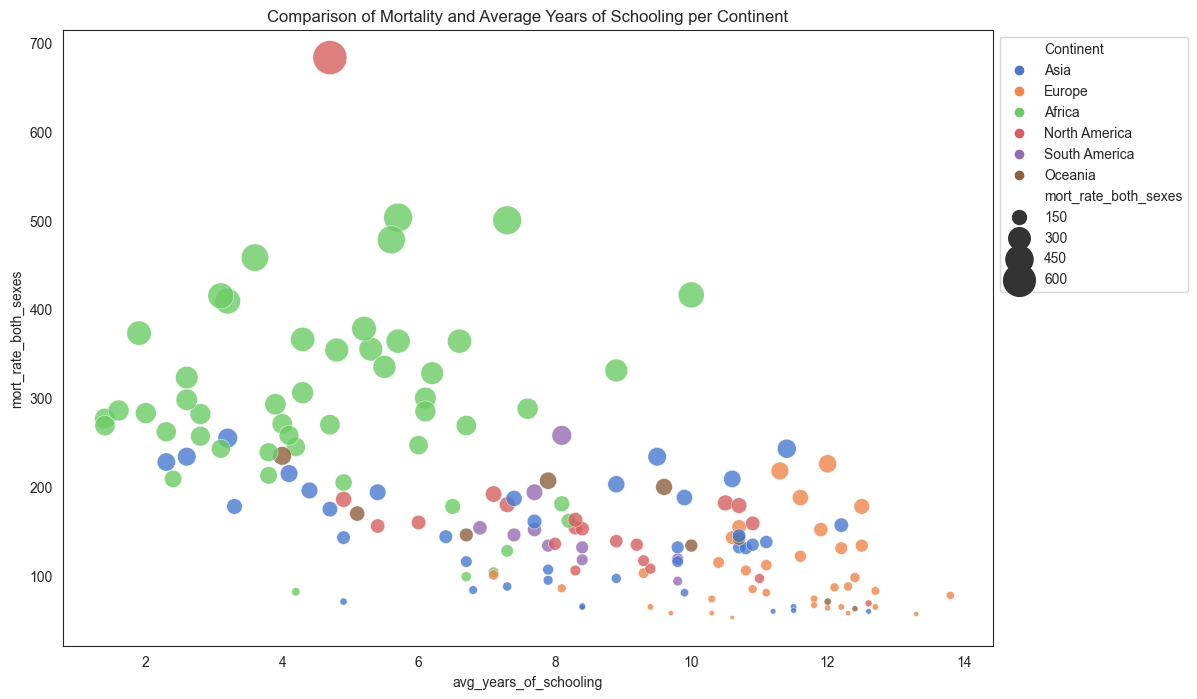

In [159]:
ax = sns.scatterplot(df_2010, x='avg_years_of_schooling',y='mort_rate_both_sexes',
                    hue='Continent', size=(df_2010['mort_rate_both_sexes']),
                    sizes=(10,600), alpha=.8, palette='muted')
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))
plt.title('Comparison of Mortality and Average Years of Schooling per Continent')

In [164]:
import plotly.express as px
px.scatter(x=df_2010['avg_years_of_schooling'], y=df_2011['mort_rate_both_sexes'],size=df_2010['mort_rate_both_sexes'])

In [162]:
df_2010.sort_values(by='mort_rate_both_sexes')

,Country,Code,Year,avg_years_of_schooling,mort_rate_both_sexes,mort_rate_male,mort_rate_female,Continent
68,Iceland,ISL,2010,10.6,53,67,39,Europe
144,Switzerland,CHE,2010,13.3,57,71,43,Europe
74,Italy,ITA,2010,9.7,58,75,41,Europe
143,Sweden,SWE,2010,12.3,58,72,43,Europe
95,Malta,MLT,2010,10.3,58,75,41,Europe
...,...,...,...,...,...,...,...,...
28,Central African Republic,CAF,2010,3.6,458,468,449,Africa
85,Lesotho,LSO,2010,5.6,478,520,449,Africa
161,Zimbabwe,ZWE,2010,7.3,500,534,474,Africa
49,Eswatini,SWZ,2010,5.7,503,576,441,Africa
